## Import Package

In [21]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Dropdown
import ipywidgets as widgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data from Resource

Data repository by John Hopkins CSSE.
https://github.com/CSSEGISandData/COVID-19

In [273]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [274]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14,15,15,18,18,21,23,25,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,22,23,23,23,23,23,24,25,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,205,235,256,275,293,313,326,336,348,364
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,23,25,26,26,29,29,31,33,33,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [275]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [276]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29,32,32,32,32,32,40,43,54,99
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,154,165,182,197,217,232,248,251,277,283
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,237,347,405,460,591,601,691,708,783,846
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,58,71,71,128,128,128,169,169,191
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,4,4,4,5,5,5,5


In [277]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-18 02:38:34,-25.0000,133.0000,6522,66,3808,2648,25.616955,NaN,NaN,1.011960,36,AUS
1,Austria,2020-04-18 02:30:33,47.5162,14.5501,14595,431,9704,4460,162.051430,NaN,NaN,2.953066,40,AUT
2,Canada,2020-04-18 02:38:18,60.0010,-95.0010,32857,1356,10559,20942,86.795379,NaN,NaN,4.126974,124,CAN
3,China,2020-04-18 01:15:10,30.5928,114.3055,83783,4636,77572,1575,5.964577,NaN,NaN,5.533342,156,CHN
4,Denmark,2020-04-18 02:30:33,56.0000,10.0000,7268,336,3571,3361,125.479028,NaN,NaN,4.623005,208,DNK


## Data Cleaning

In [278]:
# Make the column names become lowercase
country_df.columns = map(str.lower, country_df.columns)
country_df.columns

Index(['country_region', 'last_update', 'lat', 'long_', 'confirmed', 'deaths',
       'recovered', 'active', 'incident_rate', 'people_tested',
       'people_hospitalized', 'mortality_rate', 'uid', 'iso3'],
      dtype='object')

In [279]:
# Implement similar to other tables
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [280]:
# Rename province/state to state and country/region column names to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
confirmed_df.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [281]:
# Implement similar to other tables
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = recovered_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

Sorting by `confirmed`, highlighting columns, and calculating total cases

In [282]:
# Sorting contry_df by confirmed case desc
sorted_country_df = country_df.sort_values('confirmed', ascending=False)
sorted_country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-04-18 02:30:52,40.000000,-100.00000,701475,37054,59452,604969,212.912530,NaN,NaN,5.282298,840,USA
160,Spain,2020-04-18 02:30:33,40.463667,-3.74922,190839,20002,74797,96040,408.170005,NaN,NaN,10.481086,724,ESP
10,Italy,2020-04-18 02:30:33,41.871900,12.56740,172434,22745,42727,106962,285.194817,NaN,NaN,13.190554,380,ITA
6,France,2020-04-18 02:30:33,46.227600,2.21370,149130,18703,35008,95419,228.469398,NaN,NaN,12.541407,250,FRA
7,Germany,2020-04-18 02:30:33,51.165700,10.45150,141397,4352,83114,53931,168.763837,NaN,NaN,3.077859,276,DEU


In [283]:
def highlight_col(x):
    r = 'background-color: red'
    g = 'background-color: green'
    b = 'background-color: blue'
    temp_df = pd.DataFrame('', index=x.index, columns=x.columns)
    temp_df.iloc[:,4] = r
    temp_df.iloc[:,5] = g
    temp_df.iloc[:,6] = b
    return temp_df

In [13]:
sorted_country_df.style.apply(highlight_col, axis=None)

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-04-17 10:30:51,40.000000,-100.000000,671425,33286,56236,581903,203.791718,nan,nan,4.957516,840,USA
160,Spain,2020-04-17 10:30:31,40.463667,-3.749220,184948,19315,74797,90836,395.570224,nan,nan,10.443476,724,ESP
10,Italy,2020-04-17 10:30:31,41.871900,12.567400,168941,22170,40164,106607,279.417619,nan,nan,13.122925,380,ITA
6,France,2020-04-17 10:30:31,46.227600,2.213700,147101,17941,33337,95823,225.360940,nan,nan,12.196382,250,FRA
7,Germany,2020-04-17 10:30:31,51.165700,10.451500,138135,4093,81800,52242,164.870489,nan,nan,2.963043,276,DEU
16,United Kingdom,2020-04-17 10:30:31,55.000000,-3.000000,104155,13759,393,90003,153.426323,nan,nan,13.210120,826,GBR
3,China,2020-04-17 09:19:52,30.592800,114.305500,83760,4636,77551,1573,5.962940,nan,nan,5.534862,156,CHN
89,Iran,2020-04-17 10:30:31,32.427908,53.688046,77995,4869,52229,20897,92.858981,nan,nan,6.242708,364,IRN
172,Turkey,2020-04-17 10:30:31,38.963700,35.243300,74193,1643,7089,65461,87.969908,nan,nan,2.214495,792,TUR
32,Belgium,2020-04-17 10:30:31,50.833300,4.469936,36138,5163,7961,23014,311.813610,nan,nan,14.286900,56,BEL


In [284]:
def total_cases(x):
    confirmed_total = int(x['confirmed'].sum())
    deaths_total = int(x['deaths'].sum())
    recovered_total = int(x['recovered'].sum())
    return confirmed_total, deaths_total, recovered_total

In [285]:
c, d, r = total_cases(sorted_country_df)
print(f'Confirmed Cases: {c}\nDeaths Cases: {d}\nRecovered Cases: {r}')

Confirmed Cases: 2243512
Deaths Cases: 154209
Recovered Cases: 569506


## Basic Visualization

Using `matplotlib`

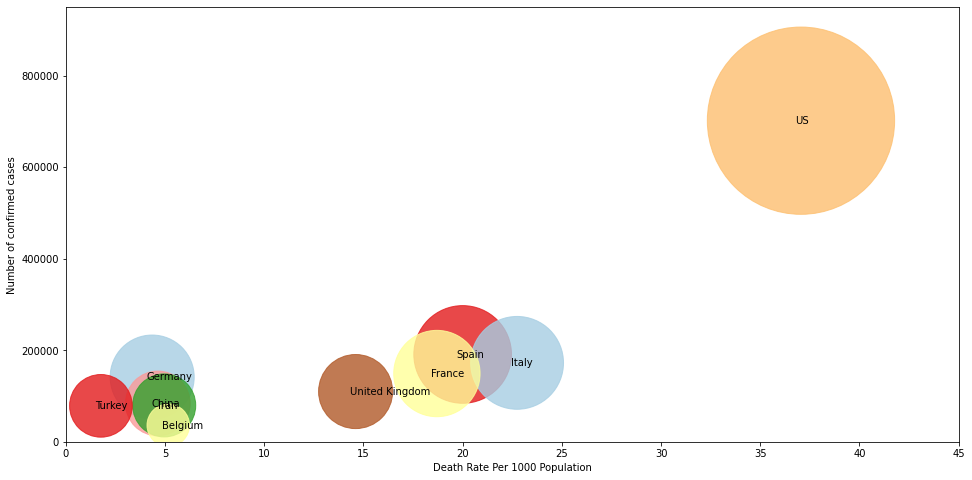

In [321]:
# Diplay bubble chart by country by confirmed, deaths, and recovered cases

# p and q will be 'confirmed', 'death', or 'recovered'
def bubble_top(p, q):
    # Top 10 countries
    countries = sorted_country_df['country'].head(10)
    countries_confirmed, countries_death, countries_recovered = [], [], []
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)
    colors = np.random.rand(len(countries))
    
    if (p == 'confirmed' and q == 'death') or (p == 'death' and q == 'confirmed'):
        sorted_confirmed = country_df.sort_values('confirmed', ascending=False)
        countries_confirmed = sorted_confirmed['confirmed'].head(10)
        countries_death = sorted_confirmed['deaths'].head(10)
        
        # Choosing colormap https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
        ax.scatter(countries_death/1000, countries_confirmed, c=colors, s=countries_confirmed/20, alpha=0.8, cmap='Paired')

        ax.set_xlabel('Death Rate Per 1000 Population')
        ax.set_ylabel('Number of confirmed cases')
        ax.set_xlim(0, 45)
        ax.set_ylim(0, 950000)

        offset = 0.3
        for x, y, country in zip(countries_death/1000, countries_confirmed, countries):
            ax.text(x - offset, y, country, va='center')
        
        plt.show()
        
    elif (p == 'confirmed' and q == 'recovered') or (p == 'recovered' and q == 'confirmed'):
        sorted_confirmed = country_df.sort_values('confirmed', ascending=False)
        countries_confirmed = sorted_confirmed['confirmed'].head(10)
        countries_recovered = sorted_confirmed['recovered'].head(10)
        
        ax.scatter(countries_recovered/1000, countries_confirmed, c=colors, s=countries_confirmed/20, alpha=0.8, cmap='viridis')

        ax.set_xlabel('Recovered Rate Per 1000 Population')
        ax.set_ylabel('Number of confirmed cases')
        ax.set_xlim(0, 90)
        ax.set_ylim(0, 950000)

        offset = 0.3
        for x, y, country in zip(countries_recovered/1000, countries_confirmed, countries):
            ax.text(x - offset, y, country, va='center')
            
        plt.show()
            
    elif (p == 'death' and q == 'recovered') or (p == 'recovered' and q == 'death'):
        sorted_death = country_df.sort_values('deaths', ascending=False)
        countries_death = sorted_death['deaths'].head(10)
        countries_recovered = sorted_death['recovered'].head(10)
        
        ax.scatter(countries_recovered/1000, countries_death, c=colors, s=countries_death/15, alpha=0.8, cmap='viridis')

        ax.set_xlabel('Recovered Rate Per 1000 Population')
        ax.set_ylabel('Number of Death cases')
        ax.set_xlim(0, 85)
        ax.set_ylim(0, 40000)

        offset = 0.3
        for x, y, country in zip(countries_recovered/1000, countries_death, countries):
            ax.text(x - offset, y, country, va='center')
            
        plt.show()
            
    else:
        print('You choose wrong params!')
    
bubble_top('confirmed', 'death')

In [290]:
# Display daily cases of a country
def daily_cases_country(country):
    c_date, c_case, d_date, d_case, r_date, r_case = [], [], [], [], [], []
    
    if country.lower() == 'world':
        c_date = np.array(list(confirmed_df.iloc[:, 4:].columns))
        c_case = np.sum(np.asarray(confirmed_df.iloc[:, 4:]), axis=0)
        d_date = np.array(list(death_df.iloc[:, 4:].columns))
        d_case = np.sum(np.asarray(death_df.iloc[:, 4:]), axis=0)
        r_date = np.array(list(recovered_df.iloc[:, 4:].columns))
        r_case = np.sum(np.asarray(recovered_df.iloc[:, 4:]), axis=0)
    else:
        c_date = np.array(list(confirmed_df.iloc[:, 4:].columns))
        c_case = np.sum(np.asarray(confirmed_df[confirmed_df['country'] == country].iloc[:, 4:]), axis=0)
        d_date = np.array(list(death_df.iloc[:, 4:].columns))
        d_case = np.sum(np.asarray(death_df[death_df['country'] == country].iloc[:, 4:]), axis=0)
        r_date = np.array(list(recovered_df.iloc[:, 4:].columns))
        r_case = np.sum(np.asarray(recovered_df[recovered_df['country'] == country].iloc[:, 4:]), axis=0)

    plt.figure(figsize=(16, 6))
    plt.plot(c_date, c_case)
    plt.plot(d_date, d_case)
    plt.plot(r_date, r_case)
    plt.legend(["Confirmed", "Death", "Recovered"])
    plt.title(f"Day vs Total Cases in {country}")
    plt.xlabel("Day")
    plt.ylabel("Total Case")
    plt.xticks(rotation=90) # Rotate axis to 90 degree
    plt.show()

interact(daily_cases_country, country='World')

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.daily_cases_country(country)>

## Combined with Data List Countries

Data repository by UN https://unstats.un.org/unsd/methodology/m49/overview/

You can download data using Excel or CSV

In [106]:
df = pd.read_excel('data/UNSD_Methodology.xlsx')
df.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SDN,x,NaN,NaN,Developing


In [107]:
# Get important columns
continent_df = df.iloc[0:, [3, 5, 8, 10, 14]]
continent_df.head()

,Region Name,Sub-region Name,Country or Area,ISO-alpha3 Code,Developed / Developing Countries
0,Africa,Northern Africa,Algeria,DZA,Developing
1,Africa,Northern Africa,Egypt,EGY,Developing
2,Africa,Northern Africa,Libya,LBY,Developing
3,Africa,Northern Africa,Morocco,MAR,Developing
4,Africa,Northern Africa,Sudan,SDN,Developing


In [180]:
# Customize column name
continent_df = continent_df.rename(columns={'Region Name': 'region', 'Sub-region Name': 'sub_region', 'Country or Area': 'country', 'ISO-alpha3 Code': 'code', 'Developed / Developing Countries': 'status'})
continent_df.head()

,region,sub_region,country,code,status
0,Africa,Northern Africa,Algeria,DZA,Developing
1,Africa,Northern Africa,Egypt,EGY,Developing
2,Africa,Northern Africa,Libya,LBY,Developing
3,Africa,Northern Africa,Morocco,MAR,Developing
4,Africa,Northern Africa,Sudan,SDN,Developing


In [109]:
# Drop missing values
continent_df = continent_df.dropna(axis=0)
continent_df.shape

(247, 5)

In [110]:
#def cases_continent(continent):
unique_regions = continent_df['region'].unique()
unique_regions

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [58]:
def 

Dropdown(options=unique_regions)

Dropdown(options=('Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'A…

In [76]:
def cases_continent(continent):
    
    # Diplay bubble chart by country by confirmed and deaths cases
    # Top 10 countries
    
    selected_countries = np.asarray(continent_df.iloc[continent_df.index[continent_df['region'] == continent].tolist(),0:]['country'])
    choosen_country_df = 
    countries = sorted_country_df['country'].head(10)
    countries_confirmed = sorted_country_df['confirmed'].head(10)
    countries_death = sorted_country_df['deaths'].head(10)

    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    colors = np.random.rand(len(countries)) / 100

    # Choosing colormap https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
    ax.scatter(countries_death/1000, countries_confirmed, c=colors, s=countries_confirmed/20, alpha=0.7, cmap='viridis')

    ax.set_xlabel('Death Rate Per 1000 Population')
    ax.set_ylabel('Number of confirmed cases')

    offset = 0.5
    for x, y, country in zip(countries_death/1000, countries_confirmed, countries):
        ax.text(x - offset, y, country, va='center')

    plt.show()

In [160]:
iso3_list = np.asarray(continent_df.iloc[continent_df.index[continent_df['region'] == 'Asia'].tolist(),0:]['code'])
iso3_list

array(['KGZ', 'TJK', 'TKM', 'UZB', 'CHN', 'HKG', 'MAC', 'PRK', 'JPN',
       'MNG', 'KOR', 'BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL',
       'SGP', 'THA', 'TLS', 'VNM', 'AFG', 'BGD', 'BTN', 'IND', 'IRN',
       'MDV', 'NPL', 'PAK', 'LKA', 'ARM', 'AZE', 'BHR', 'CYP', 'GEO',
       'IRQ', 'ISR', 'JOR', 'KWT', 'LBN', 'OMN', 'QAT', 'SAU', 'PSE',
       'SYR', 'TUR', 'ARE', 'YEM', 'BLR'], dtype=object)

In [236]:
def add_continent(iso3):
    for c in continent_df['code']:
        if iso3 == c:
            return continent_df['region']
        else:
            return ''
        
country_df['iso3'].dropna(axis=0)
choose_list = np.asarray(
    country_df.iloc[
        country_df.index[
            np.asarray(continent_df.iloc[np.where(np.asarray(continent_df['code']) == country_df['iso3'])[0], 0:1])[0]
        ].tolist()
        ,
        0:
    ]
)
choose_list

/Users/kaist.eko/DS/miniconda3/envs/playground/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


ValueError: Lengths must match to compare

In [234]:
def add_continent(iso3):
    index = 0
    for c in continent_df['code']:
        if str(iso3) == str(c):
            print(index)
            #return continent_df['region']
        else:
            #return ''
            print('')
        index = index + 1

result = np.asarray(continent_df.iloc[np.where(np.asarray(continent_df['code']) == 'USA')[0], 0:1])[0][0]
result
#add_continent('USA')
#country_df['continent'] = add_continent(country_df['iso3'])
#country_df.head()   

'Americas'

In [256]:
def add_cont(code):
    return np.asarray(continent_df.iloc[np.where(np.asarray(continent_df['code']) == code)[0], 0:1])[0][0]

np.asarray(country_df['iso3'].dropna())

array(['AUS', 'AUT', 'CAN', 'CHN', 'DNK', 'FIN', 'FRA', 'DEU', 'ISL',
       'IRL', 'ITA', 'NLD', 'NOR', 'RUS', 'SWE', 'CHE', 'GBR', 'USA',
       'AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN',
       'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'MMR', 'BDI',
       'CPV', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'COL', 'COG', 'COD',
       'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI',
       'GAB', 'GMB', 'GEO', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'VAT', 'HND', 'HUN', 'IND', 'IDN', 'IRN', 'IRQ',
       'ISR', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'XKS', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM', 'NPL', 'NZL',
       'NIC', 'NER',